In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from astropy.io import ascii
import celerite

from astropy import units as u
from astropy import constants as const
import numpy as np

In [2]:
# Import lmfit to fit a guassian to each specrtrum:
from lmfit import Model, minimize, Parameters, report_fit
from lmfit.models import GaussianModel, PolynomialModel

In [3]:
# Load the 67 Data:
OHdata67 = ascii.read('C:/Users/seven/OneDrive/Documents/OH Data 1667 Profile/OH199070p2800_67.ascii', data_start=4)
vel67 = OHdata67['col1']
Ta67 = OHdata67['col2']

# Galactic range choice:
igood = np.where((vel67 >= -400) & (vel67 <= 400))
# Select Galactic range:
vel67 = vel67[igood]
Ta67 = Ta67[igood]

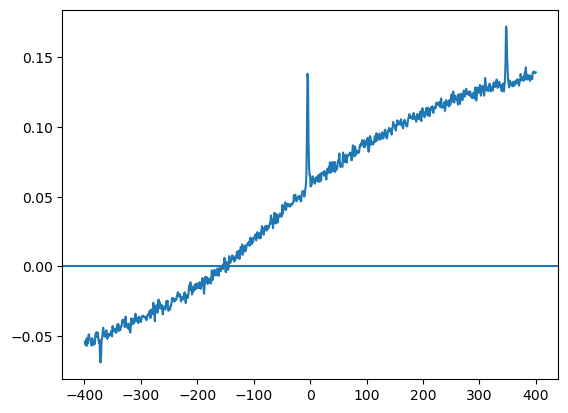

In [4]:
plt.plot(vel67, Ta67)
plt.axhline(0)

In [5]:
# Fitting the background:
mod = PolynomialModel(degree=6)

# Baseline regions:
igoodNeg = list(np.where((vel67 >= -300) & (vel67 <= -30))[0])
igoodPos = list(np.where((vel67 >= 30) & (vel67 <= 300))[0])

igood = igoodNeg+igoodPos

# Do the fitting:
pars = mod.guess(Ta67[igood], x=vel67[igood])
out = mod.fit(Ta67[igood], pars, x=vel67[igood])

In [6]:
print(out.fit_report(min_correl=0.3))

[[Model]]
    Model(polynomial)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 17
    # data points      = 583
    # variables        = 7
    chi-square         = 0.00358693
    reduced chi-square = 6.2273e-06
    Akaike info crit   = -6981.21122
    Bayesian info crit = -6950.63391
    R-squared          = 0.99797576
[[Variables]]
    c0:  0.05769345 +/- 2.8977e-04 (0.50%) (init = 0.05769345)
    c1:  3.5434e-04 +/- 2.4996e-06 (0.71%) (init = 0.0003543429)
    c2: -4.7799e-07 +/- 3.4497e-08 (7.22%) (init = -4.779948e-07)
    c3: -1.1756e-09 +/- 1.0894e-10 (9.27%) (init = -1.175609e-09)
    c4:  7.2426e-12 +/- 9.8776e-13 (13.64%) (init = 7.242578e-12)
    c5:  2.7297e-15 +/- 1.0607e-15 (38.86%) (init = 2.729707e-15)
    c6: -4.0645e-17 +/- 7.6783e-18 (18.89%) (init = -4.064472e-17)
[[Correlations]] (unreported correlations are < 0.300)
    C(c4, c6) = -0.9846
    C(c3, c5) = -0.9753
    C(c2, c4) = -0.9643
    C(c1, c3) = -0.9179
    C(c2, c6) = +0.9077
  

(-0.1, 0.2)

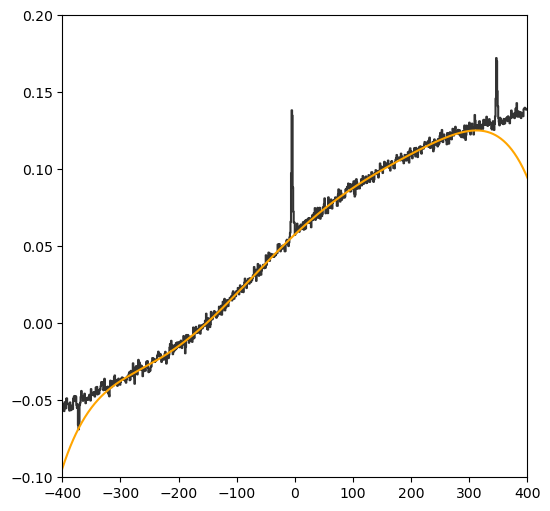

In [7]:
x = np.linspace(-400, 400, 864)
y_eval = mod.eval(pars, x=x)

igood = list(np.where((vel67 >= -400) & (vel67 <= 400))[0])

fig, ax = plt.subplots(figsize=(6,6))
ax.step(vel67[igood], Ta67[igood], color='k', alpha=0.8, ls='solid')

plt.plot(x, y_eval, 'orange')
ax.set_xlim([-400, 400])
ax.set_ylim([-0.1, 0.2])

In [8]:
len(vel67)

864

In [9]:
vel67[1]-vel67[0]

0.9258826044026591

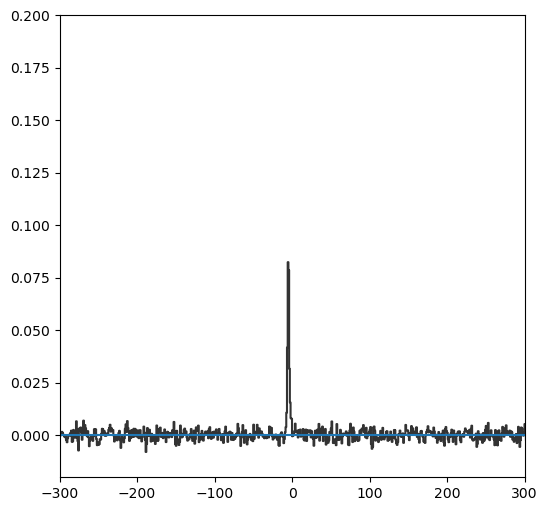

In [10]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.step(vel67[igood], Ta67[igood]-y_eval, color='k', alpha=0.8, ls='solid')
ax.set_xlim([-300, 300])
ax.set_ylim([-0.02, 0.2])
ax.axhline(0)

In [11]:
Ta67sub = Ta67[igood]-y_eval

In [12]:
#baseline region noise
igood = np.where((vel67 >= -300) & (vel67 <= -100))[0]
np.std(Ta67sub[igood])

0.002571034048457282

In [13]:
from scipy.optimize import curve_fit

def Gauss(x, A, B, C):
    #y = A*np.exp(-1*B*x**2)
    y = A*np.exp(-(x-B)**2 / (2.*C**2))
    return y

In [14]:
# igood statements for OH features:
igood1 = np.where((vel67 >= -30) & (vel67 <= 30))[0]

(-100.0, 100.0)

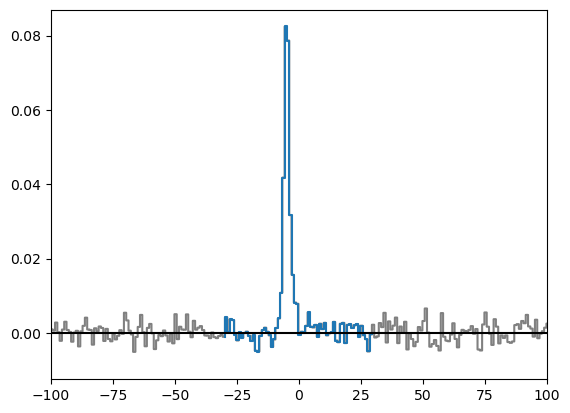

In [15]:
plt.step(vel67, Ta67sub, 'grey', label = 'data')
plt.step(vel67[igood1], Ta67sub[igood1])
plt.axhline(0, color = 'k')
plt.xlim(-100, 100)

In [16]:
parameters1, covariance1 = curve_fit(Gauss, vel67[igood1], Ta67sub[igood1], p0=[0.03, 0, 4])
fit1A = parameters1[0]
fit1B = parameters1[1]
fit1C = parameters1[2]
fit_1y = Gauss(vel67, fit1A, fit1B, fit1C)
print(parameters1)

[ 0.08681363 -4.35683888  1.1118202 ]


Text(0.5, 1.0, 'OH 67 119070p2800')

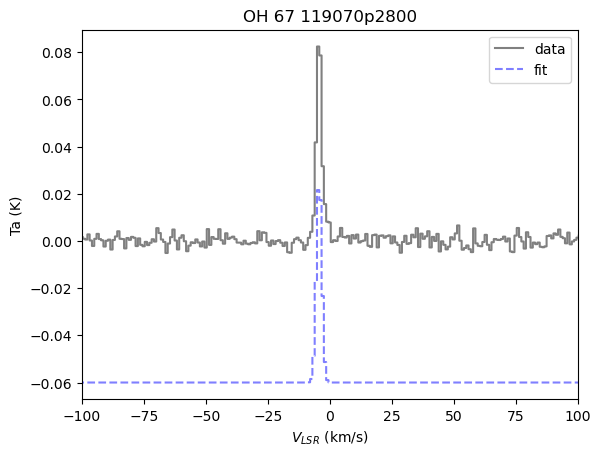

In [19]:
plt.step(vel67, Ta67sub, 'grey', label = 'data', where = 'mid')
#plt.step(vel67, fit_1y, 'blue', label='fit')
plt.step(vel67, fit_1y-.06, color='blue', label='fit', ls='dashed', alpha=0.5, where = 'mid')
plt.xlim(-100, 100)
#x = np.linspace(-50, 50, 0.1)
#plt.step(x, fit_1y, 'green',)
plt.legend(loc = 'best')
plt.xlabel(r'$V_{LSR}$ (km/s)')
plt.ylabel('Ta (K)')
fig.tight_layout()
plt.title('OH 67 119070p2800')

In [95]:
len(Ta67)

864

In [96]:
len(Ta67[igood])

216

In [97]:
len(vel67[igood])

216

In [98]:
#subtracting order 6 polynomial
Ta67sub = Ta67[igood]-y_eval

ValueError: operands could not be broadcast together with shapes (216,) (864,) 

In [99]:
# Fitting the background:
mod = PolynomialModel(degree=4)

# Baseline regions:
igoodNeg = list(np.where((vel67 >= -400) & (vel67 <= -10))[0])
igoodPos = list(np.where((vel67 >= 30) & (vel67 <= 400))[0])

igood = igoodNeg + igoodPos

# Do the fitting:
pars = mod.guess(Ta67sub[igood], x=vel67[igood])
out = mod.fit(Ta67sub[igood], pars, x=vel67[igood])

In [21]:
len(Ta67sub)

864

(-0.02, 0.2)

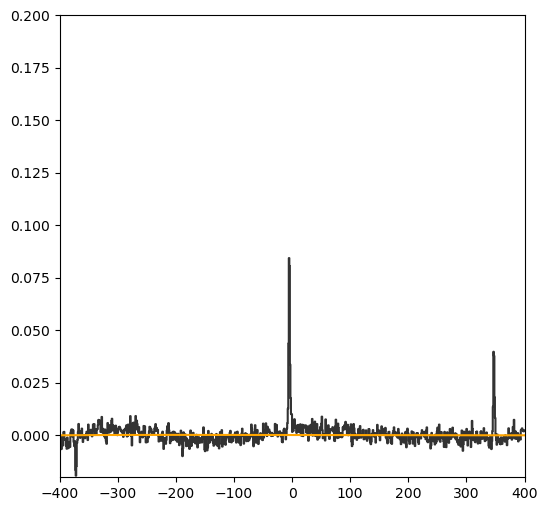

In [25]:
x = np.linspace(-400, 400, 864)
y_eval = mod.eval(pars, x=x)

igood = list(np.where((vel67 >= -400) & (vel67 <= 400))[0])

fig, ax = plt.subplots(figsize=(6,6))
ax.step(vel67, Ta67sub, color='k', alpha=0.8, ls='solid')

plt.plot(x, y_eval, 'orange')
ax.set_xlim([-400, 400])
ax.set_ylim([-0.02, 0.2])

In [26]:
Ta67sub = Ta67sub-y_eval

(-0.02, 0.2)

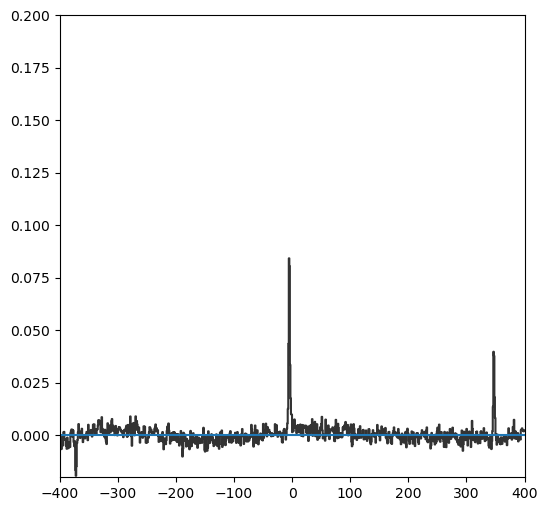

In [27]:
fig, ax = plt.subplots(figsize = (6, 6))
ax.step(vel67, Ta67sub, color='k', alpha=0.8, ls='solid')
ax.axhline(0)
ax.set_xlim([-400, 400])
ax.set_ylim([-0.02, 0.2])

In [28]:
from scipy.optimize import curve_fit

def Gauss(x, A, B, C):
    #y = A*np.exp(-1*B*x**2)
    y = A*np.exp(-(x-B)**2 / (2.*C**2))
    return y

In [29]:
# igood statements for OH features:
igood1 = np.where((vel67 >= -20) & (vel67 <= 0))[0]
igood2 = np.where((vel67 >= 330) & (vel67 <= 370))[0] # Inter-arm feature
#igood3 = np.where((vel67 >= 350) & (vel67 <= 400))[0] # Perseus Arm
#igoodOut = np.where((vel67 >= -90) & (vel67 <= -75))[0] # Outer Arm

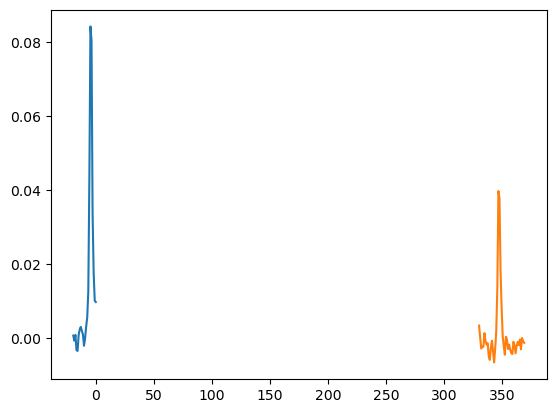

In [30]:
plt.plot(vel67[igood1], Ta67sub[igood1])
plt.plot(vel67[igood2], Ta67sub[igood2])
#plt.plot(vel67[igoodPer], Ta67sub[igoodPer])
#plt.plot(vel67[igoodOut], Ta67sub[igoodOut])

In [43]:
# Note: It is very important to pass initial guesses to curve_fit!

# Fitting the Gaussian for the Local Arm feature:
parameters1, covariance1 = curve_fit(Gauss, vel67[igood1], Ta67sub[igood1], p0=[0.03, 0, 4])
fit1A = parameters1[0]
fit1B = parameters1[1]
fit1C = parameters1[2]
fit_1y = Gauss(vel67, fit1A, fit1B, fit1C)

# Fitting the Gaussian for the Inter Arm feature:
#parameters2, covariance2= curve_fit(Gauss, vel67[igood2], Ta67sub[igood2], p0=[0.05, 320, 380])
#fit2A = parameters2[0]
#fit2B = parameters2[1]
#fit2C = parameters2[2]
#fit_2y = Gauss(vel67, fit2A, fit2B, fit2C)

# Fitting the Gaussian for the Perseus Arm feature:
#parametersPer, covariancePer = curve_fit(Gauss, vel67[igoodPer], Ta67sub[igoodPer], p0=[0.03, -63, 4])
#fitPerA = parametersPer[0]
#fitPerB = parametersPer[1]
#fitPerC = parametersPer[2]
#fit_Pery = Gauss(vel67, fitPerA, fitPerB, fitPerC)

# Fitting the Gaussian for the Outer Arm feature:
#parametersOut, covarianceOut = curve_fit(Gauss, vel67[igoodOut], Ta67sub[igoodOut], p0=[0.015, -81, 2])
#fitOutA = parametersOut[0]
#fitOutB = parametersOut[1]
#fitOutC = parametersOut[2]
#fit_Outy = Gauss(vel67, fitOutA, fitOutB, fitOutC)

In [44]:
print(parameters1)
print(parameters2)
#print(parametersPer)
#print(parametersOut)

[ 0.08775972 -4.3533111   1.15463006]
[ 1.07505873e-03 -2.09320555e+03 -4.08061164e+05]


In [45]:
print(covariance1)
print(covariance2)
#print(covariancePer)
#print(covarianceOut)

[[ 1.19496068e-05  2.38949306e-09 -1.04825119e-04]
 [ 2.38949306e-09  2.75785193e-03 -5.86608245e-08]
 [-1.04825119e-04 -5.86608245e-08  2.75832441e-03]]
[[ 2.39979800e-01 -2.66880698e+10 -1.91646755e+12]
 [-2.66880698e+10  3.31058857e+21  2.70351364e+23]
 [-1.91646755e+12  2.70351364e+23  2.48618475e+25]]


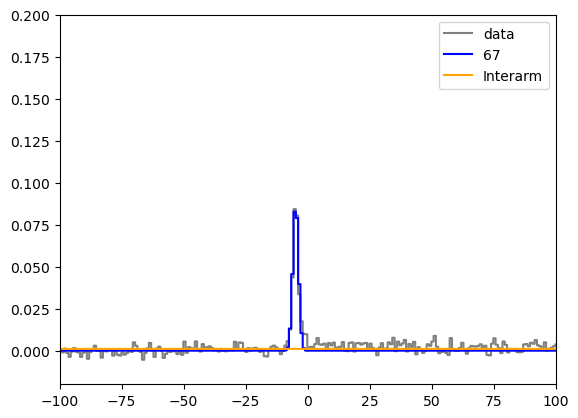

In [48]:
# Plot the result:
plt.step(vel67, Ta67sub, 'grey', label = 'data')
plt.step(vel67, fit_1y, 'blue', label='67')
plt.step(vel67, fit_2y, 'orange', label='Interarm')
#plt.step(vel67, fit_Pery, 'green', label='Perseus')
#plt.step(vel67, fit_Outy, 'red', label='Outer')
#plt.step(vel67, y_geval, 'red', label = 'lmfit')
# What we want to do is get ranges for the other fits from 
plt.xlim([-100,100])
plt.ylim([-0.02, 0.2])
plt.legend()

In [50]:
integral1 = np.sum(Ta67sub[igood1])*(vel67[1]-vel67[0])
print(integral1)
print(integral1*2.3e14)

0.27953482176516076
64293009005986.98


In [51]:
#baseline region noise
igood = np.where((vel67 >= -300) & (vel67 <= -150))[0]
np.std(Ta67sub[igood])

0.003236147623457297

In [54]:
# Number of channels in Local Profile intergral
print(len(vel67[igood1]))
print(np.sqrt(len(vel67[igood1])) * np.std(Ta67sub[igood]))
err = np.sqrt(len(vel67[igood1])) * np.std(Ta67sub[igood])

22
0.015178877814179245


In [55]:
# Signal/Noise (integral/err)
integral1/err

18.41604005165884

In [ ]:
#note for plotting
#plt.step(vel67, fit_1y-0.03, color='blue', label='fit', ls='dashed', alpha=0.5)
#plt.step(velCO, TaCO/100, color='blue', label='fit', ls='dashed', alpha=0.5)
#label = 'CO/100'